Given a set of MA params, we derive the linear filter giving the same response to a step input:

$$\tau_r \frac{dr}{dt} = -r + x_s(1-a_s)I_s + x_p(1-a_p)I_p$$

$$\tau_a \frac{da_s}{dt} = -a_s + I_s \quad \quad \tau_a \frac{da_p}{dt} = -a_p + I_p$$

When $I_s = 1, I_p=0$:

$$a_s(t) = (1 - \exp(-t/\tau_a))\Theta(t) \quad \quad \tau_r \frac{dr}{dt} = -r + x_s \exp(-t/\tau_a) \Theta(t)$$

$$r(t) = h_r \ast x_s \exp(-t/\tau_a)\Theta(t)$$

where

$$h_r = \Theta(t)\exp(-t/\tau_r)/\tau_r$$

$$r(t) = \int_0^\infty u(t-t') h(t') dt' = \frac{1}{\tau_r}\int_0^\infty x_s \Theta(t-t')\exp(-(t-t')/\tau_a) \exp(-t'/\tau_r) dt'$$

$$ = \frac{1}{\tau_r}\int_0^t x_s \exp(-(t-t')/\tau_a) \exp(-t'/\tau_r) dt'$$

$$=x_s \frac{1}{\tau_r}\exp(-t/\tau_a) \int_0^t  \exp(t'/\tau_a) \exp(-t'/\tau_r)dt'$$

$$\frac{t'}{\tau_a} - \frac{t'}{\tau_r} = \frac{\tau_r - \tau_a}{\tau_a \tau_r}t' = \gamma t'$$

$$=x_s \exp(-t/\tau_a) \frac{1}{\tau_r}\int_0^t \exp\left( \gamma t'\right) dt'$$

$$=x_s \exp(-t/\tau_a) \frac{1}{\tau_r}\left[ \frac{1}{\gamma} \exp\left( \gamma t'\right)\bigg |^t_{t' = 0} \right]$$

$$=\frac{x_s}{\gamma\tau_r}\exp(-t/\tau_a)  \left[ \exp\left( \gamma t\right) - 1 \right]$$

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_plot

DT = 0.01

T = np.arange(0, 20, DT)


def ma_to_h_ln(tau_r, tau_a, x_s, x_p, dt):
    """Given a set of MA params, get LN filters that match MA step response."""
    th = np.arange(0, np.min([10*np.max([tau_r, tau_a]), 200]), dt)  # filter time vec
    gam = (1/tau_a) - (1/tau_r)
    
    if np.abs(gam) > 1e-8:
        h_s = (x_s/(tau_r/tau_a - 1))*((-1/tau_r)*np.exp(-th/tau_r) + (1/tau_a)*np.exp(-th/tau_a))
        h_p = (x_p/(tau_r/tau_a - 1))*((-1/tau_r)*np.exp(-th/tau_r) + (1/tau_a)*np.exp(-th/tau_a))
    else:
        h_s = (x_s/tau_r)*(np.exp(-th/tau_a) - (th/tau_a)*np.exp(-th/tau_a))
        h_p = (x_p/tau_r)*(np.exp(-th/tau_a) - (th/tau_a)*np.exp(-th/tau_a))
        
    return h_s, h_p, th

In [7]:
x_s = -1

tau_r = 1
tau_a = 10 #1.9999

r_ma = np.nan*np.zeros(len(T))
a_s = np.nan*np.zeros(len(T))

r_ma[0] = 0
a_s[0] = 0

for ct, t_ in enumerate(T[1:], 1):
    da_s = DT/tau_a*(-a_s[ct-1] + 1)
    a_s[ct] = a_s[ct-1] + da_s
    
    dr_ma = DT/tau_r*(-r_ma[ct-1] + x_s*(1-a_s[ct]))
    r_ma[ct] = r_ma[ct-1] + dr_ma

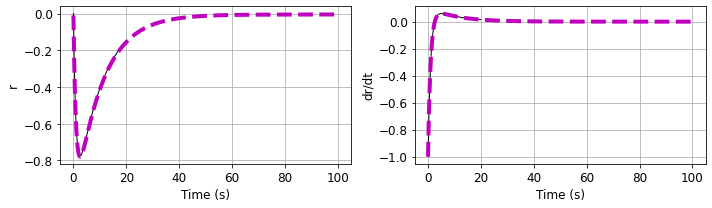

In [8]:
h_s, h_p, th = ma_to_h_ln(tau_r, tau_a, x_s, 0, DT)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
axs[0].plot(T, r_ma, c='k', lw=1)
axs[0].plot(th, h_s.cumsum()*DT, c='m', lw=4, ls='--')
axs[0].grid()
set_plot(axs[0], x_label='Time (s)', y_label='r', font_size=12)

axs[1].plot(T, np.gradient(r_ma)/DT, c='k', lw=1)
axs[1].plot(th, h_s, c='m', lw=4, ls='--')
axs[1].grid()
set_plot(axs[1], x_label='Time (s)', y_label='dr/dt', font_size=12)